参考：
https://nykergoto.hatenablog.jp/entry/2017/05/29/python%E3%81%A7%E3%82%AC%E3%82%A6%E3%82%B9%E9%81%8E%E7%A8%8B%E5%9B%9E%E5%B8%B0_~_%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%BC%E3%83%AB%E3%81%AE%E6%AF%94%E8%BC%83_~#:~:text=Python%20%E3%81%A7%20%E3%82%AC%E3%82%A6%E3%82%B9%20%E9%81%8E%E7%A8%8B%E3%82%92%E8%A1%8C%E3%81%86%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%BC%E3%83%AB%E3%81%AB%E3%81%AF%E5%A4%A7%E3%81%8D%E3%81%8F%E5%88%86%E3%81%91%E3%81%A62%E3%81%A4%E3%81%8C%E5%AD%98%E5%9C%A8%E3%81%97%E3%81%BE%E3%81%99%E3%80%82%20%E4%B8%80%E3%81%A4%E3%81%AF%20Gpy%20%28Gaussian%20Process,GitHub%20-%20SheffieldML%2FGPy%3A%20Gaussian%20processes%20framework%20in%20python

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels as sk_kern

In [35]:
np.random.seed(5)

# Define functions

In [36]:
def true_func(x):
    """
    正しい関数
    
    :param np.array x:
    :return: 関数値 y
    :rtype: np.array
    """
    y = x + np.sin(5 * x)
    return y

def plot_result(x_train, y_train, x_test, mean, std):
    plt.axis("off")
    plt.tick_params(length=0)
    plt.ylim(-2, 2)
    plt.plot(x_test[:, 0], mean, color="C0", label="predict mean")
    plt.fill_between(x_test[:, 0], mean + std, mean - std, color="C0", alpha=.3,label= "1 sigma confidence")
    plt.plot(x_train, y_train, "o",label= "training data")

# Set a train model

In [37]:
kernel = sk_kern.RBF(1.0, (1e-3, 1e3)) + sk_kern.ConstantKernel(1.0, (1e-3, 1e3)) + sk_kern.WhiteKernel()
clf = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10, 
    optimizer="fmin_l_bfgs_b", 
    n_restarts_optimizer=20,
    normalize_y=True)

In [38]:
# テストデータ（有限の予測点）を設定する
xx = np.linspace(-3, 3, 200)
x_test = xx.reshape(-1, 1)

c:\Users\ara-d\anaconda3\envs\aigle-pipeline\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\ara-d\anaconda3\envs\aigle-pipeline\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\ara-d\anaconda3\envs\aigle-pipeline\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\a

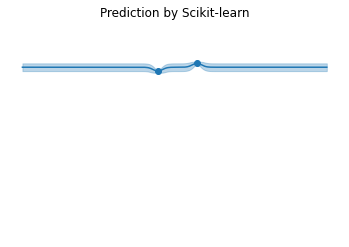

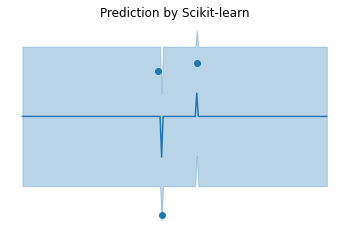

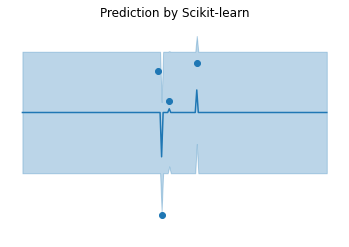

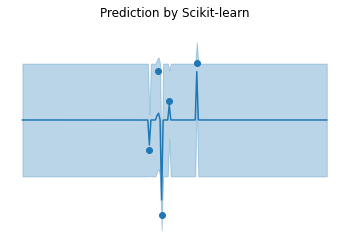

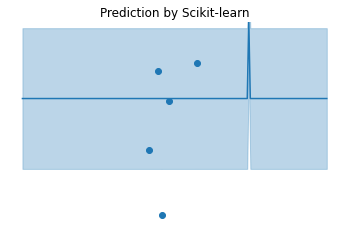

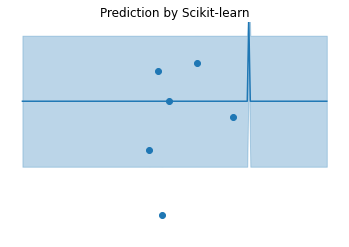

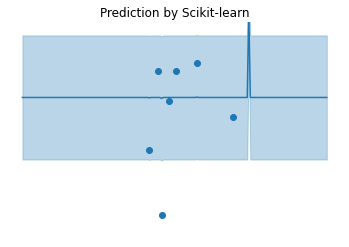

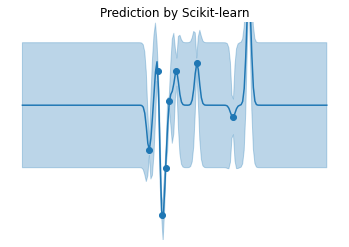

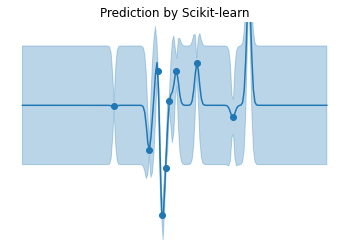

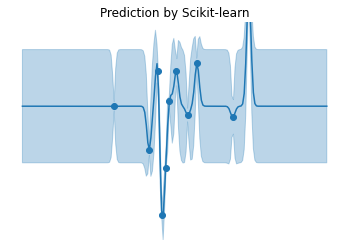

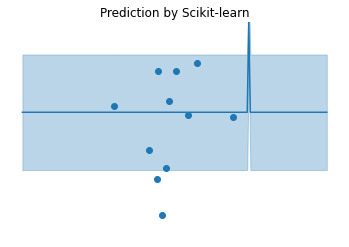

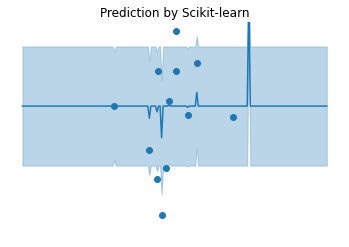

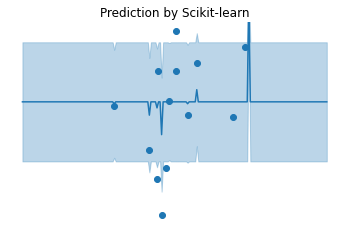

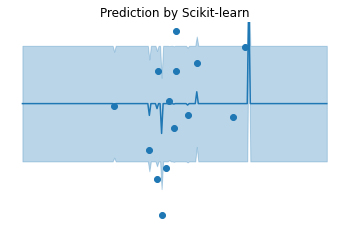

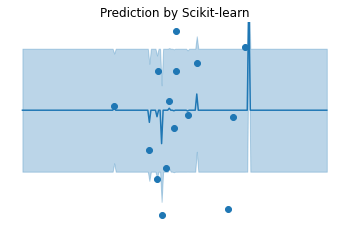

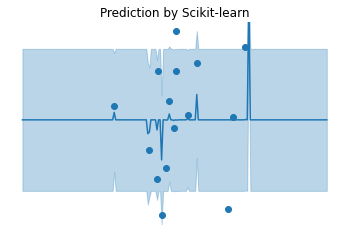

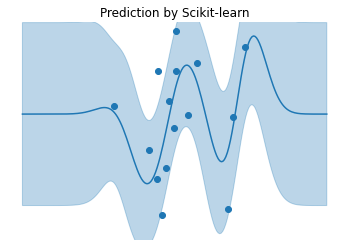

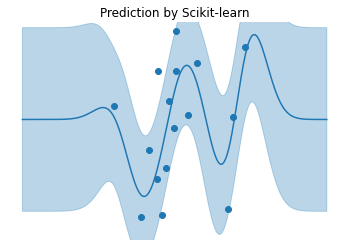

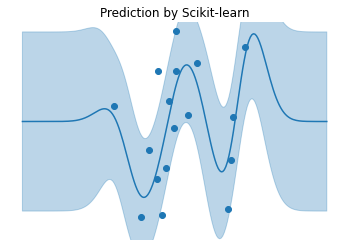

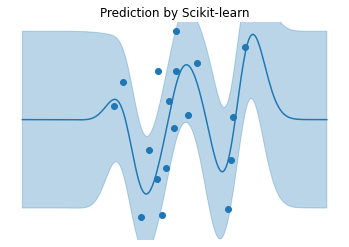

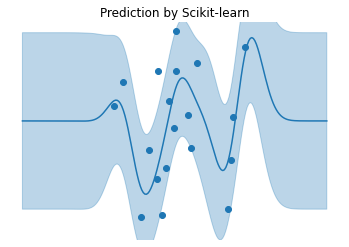

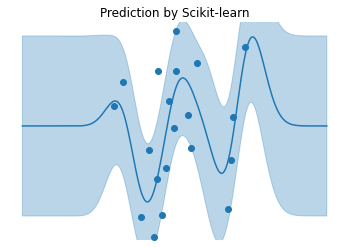

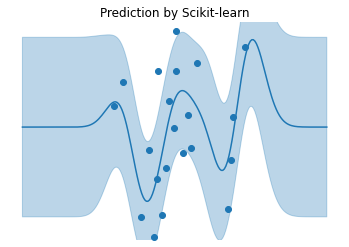

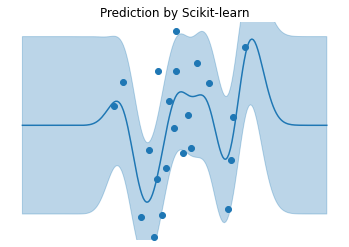

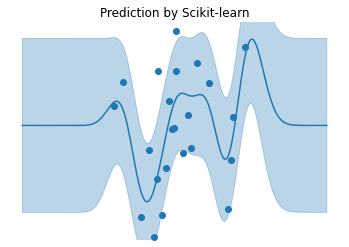

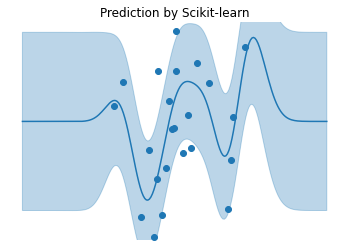

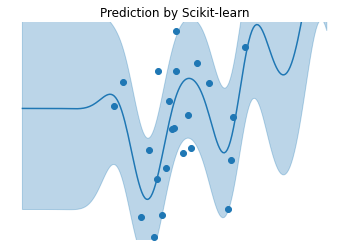

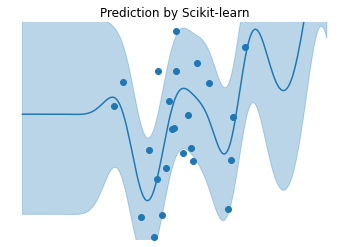

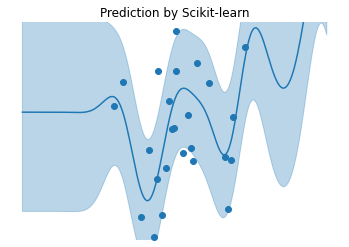

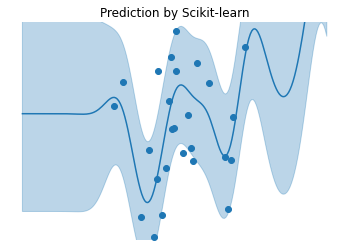

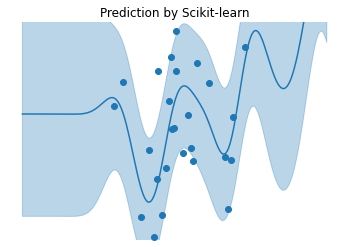

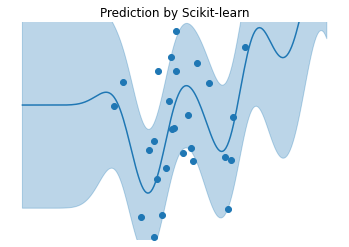

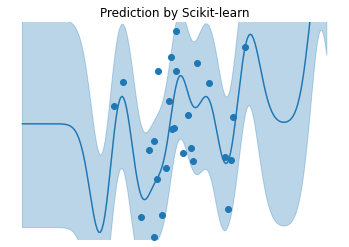

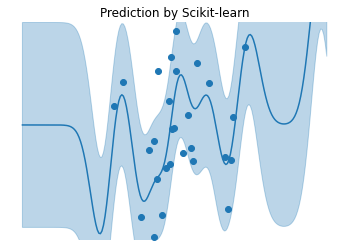

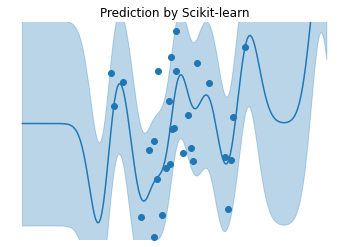

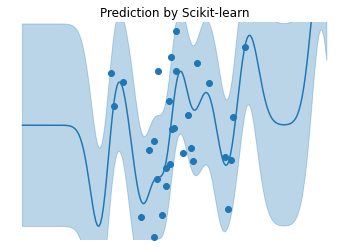

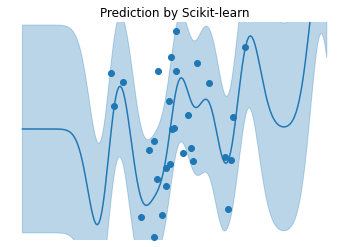

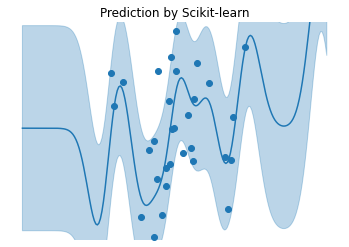

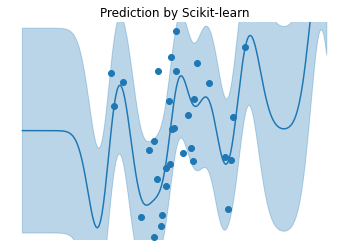

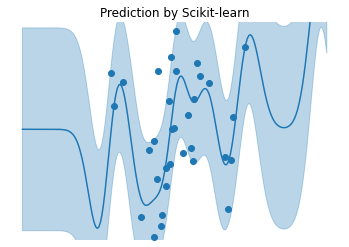

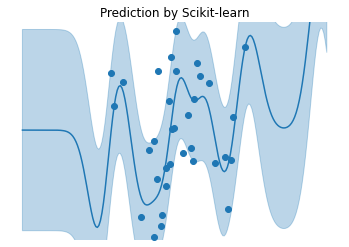

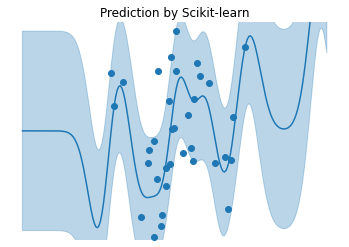

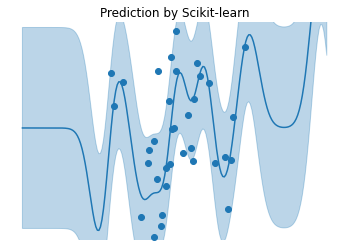

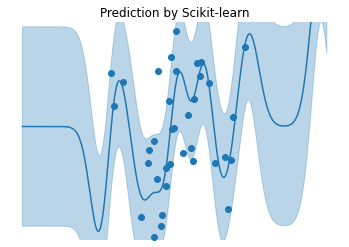

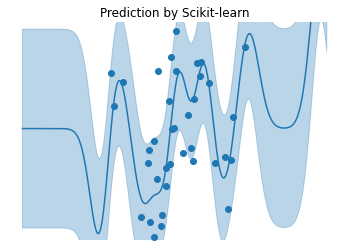

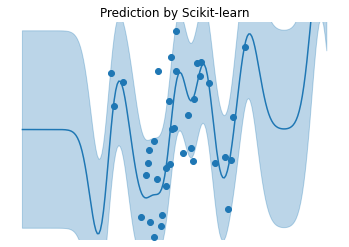

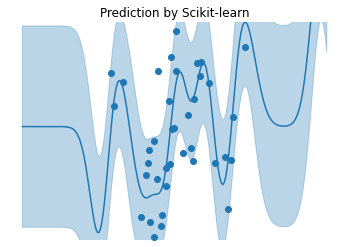

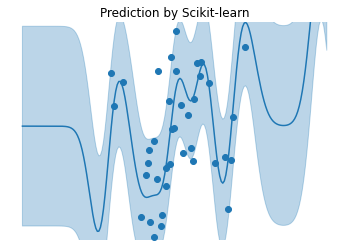

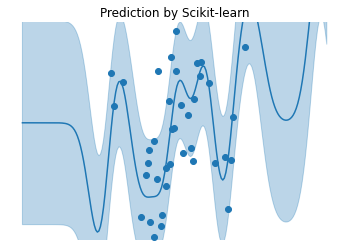

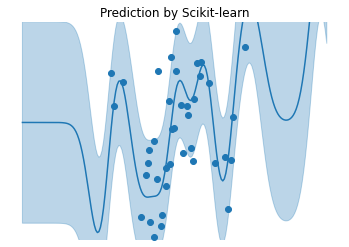

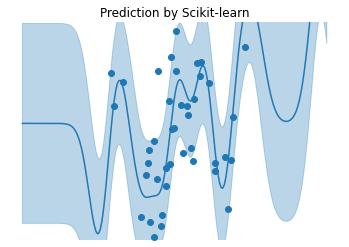

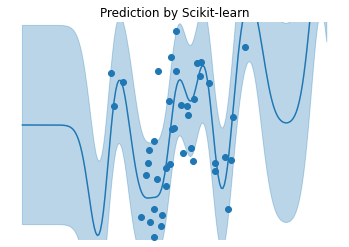

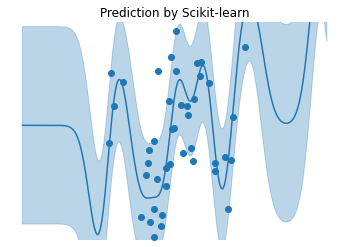

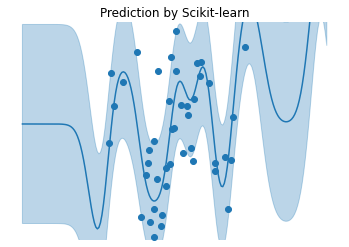

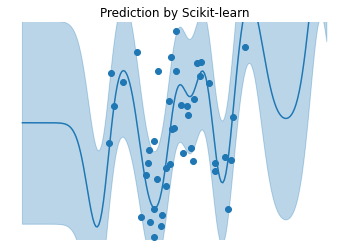

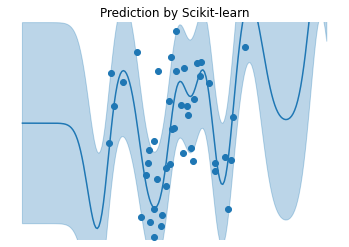

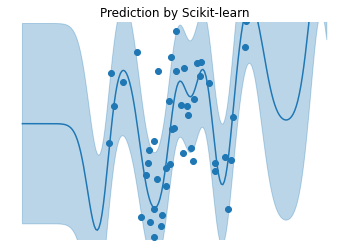

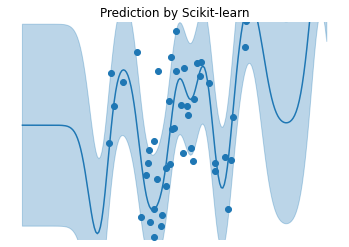

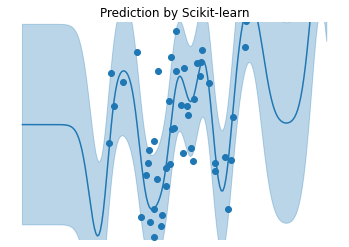

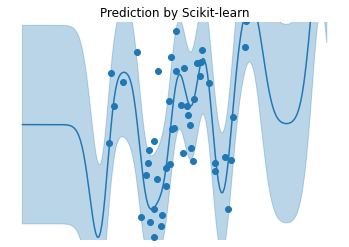

In [39]:
x_train = np.random.normal(0, 1., 1)
y_train = true_func(x_train)

for i in range(60):
    new_x = np.random.normal(0, 1)
    x_train = np.append(x_train, new_x)
    y_train = np.append(y_train, true_func(new_x) + np.random.normal(0, 1))

    # X は (n_samples, n_features) の shape に変形する必要がある
    clf.fit(x_train.reshape(-1, 1), y_train)

    # 予測は平均値と、オプションで 分散、共分散 を得ることが出来る
    pred_mean, pred_std = clf.predict(x_test, return_std=True)

    plt.figure()
    plot_result(x_train, y_train, x_test, pred_mean, pred_std)
    plt.title("Prediction by Scikit-learn")
    # plt.legend()
    plt.savefig("../fig/sklern_predict_" + str(i).zfill(2) + ".png", dpi=150)

In [40]:
import glob
import re
file_paths = glob.glob('../fig/*.png')
picList = []
for file in file_paths:
    file=re.sub(r'\\', '/', file)
    # print(file)
    picList.append(file)

In [41]:
picList.sort()
picList

['../fig/sklern_predict_00.png',
 '../fig/sklern_predict_01.png',
 '../fig/sklern_predict_02.png',
 '../fig/sklern_predict_03.png',
 '../fig/sklern_predict_04.png',
 '../fig/sklern_predict_05.png',
 '../fig/sklern_predict_06.png',
 '../fig/sklern_predict_07.png',
 '../fig/sklern_predict_08.png',
 '../fig/sklern_predict_09.png',
 '../fig/sklern_predict_10.png',
 '../fig/sklern_predict_11.png',
 '../fig/sklern_predict_12.png',
 '../fig/sklern_predict_13.png',
 '../fig/sklern_predict_14.png',
 '../fig/sklern_predict_15.png',
 '../fig/sklern_predict_16.png',
 '../fig/sklern_predict_17.png',
 '../fig/sklern_predict_18.png',
 '../fig/sklern_predict_19.png',
 '../fig/sklern_predict_20.png',
 '../fig/sklern_predict_21.png',
 '../fig/sklern_predict_22.png',
 '../fig/sklern_predict_23.png',
 '../fig/sklern_predict_24.png',
 '../fig/sklern_predict_25.png',
 '../fig/sklern_predict_26.png',
 '../fig/sklern_predict_27.png',
 '../fig/sklern_predict_28.png',
 '../fig/sklern_predict_29.png',
 '../fig/s

MovieWriter ffmpeg unavailable; using Pillow instead.


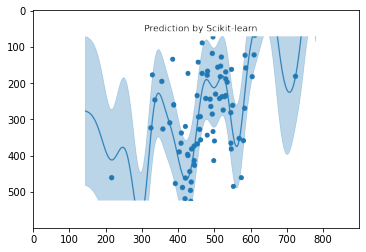

In [42]:
from PIL import Image
 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
#フォルダ名を入れます
folderName = "anime"
          
#figオブジェクトの作成
fig = plt.figure()
     
#空のリスト作成
ims = []
     
#画像ファイルを空のリストの中に1枚ずつ読み込み
for i in range(len(picList)):
         
    #読み込んで付け加えていく
    tmp = Image.open(picList[i])
    ims.append([plt.imshow(tmp)])     
     
#アニメーション作成
ani = animation.ArtistAnimation(fig, ims, interval=300, repeat_delay=1000)
 
#アニメーション保存。ファイル名を入れてください。ここではtest.gif
ani.save("test.gif")